# **Introduction to NLP in Python**

In [36]:
# Core
import numpy as np
import pandas as pd 

# NLP
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Entity Extraction
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

# Topic Modelling
import numpy as np
import pandas as pd

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_lg

from tqdm import tqdm_notebook as tqdm
from pprint import pprint

# Sentiment Analysis
import nltk
from nltk.corpus import movie_reviews
import random

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# IMDB
imdb_master = pd.read_csv("../input/imdb-review-dataset/imdb_master.csv", encoding = "ISO-8859-1")

/kaggle/input/imdb-review-dataset/imdb_master.csv


# **Basics of NLP**

In [9]:
# Example text for showing how things work
example_text = """Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""

In [10]:
# Sentence Tokenisation
tokenized_sent=sent_tokenize(example_text)
print(tokenized_sent)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [11]:
# Word level tokenisation
tokenized_word=nltk.word_tokenize(example_text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [12]:
# Most common words
fdist = nltk.FreqDist(tokenized_word)
fdist.most_common(3)

[('is', 3), (',', 2), ('The', 2)]

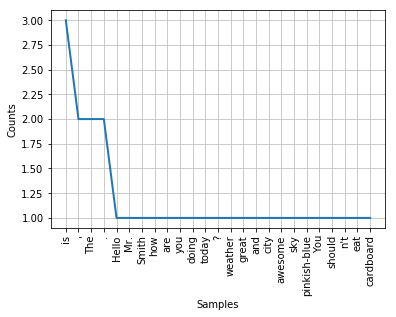

In [6]:
# Plotting frequency distribution
fdist.plot(30,cumulative=False)
plt.show()

In [13]:
# Removing stop words
stop_words=set(nltk.corpus.stopwords.words("english"))

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


In [14]:
# Lexicon Stemming 
ps = nltk.stem.PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


In [15]:
#Lexicon Normalization
lem = nltk.stem.WordNetLemmatizer()
stem = nltk.stem.porter.PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


### **Exercise**

Try it yourself! Grab a few examples sentences and try tokenisation, stemming and lemmatisation!

## **Building a Model**

Lets try building a classifier which takes counts of words as inputs and predicts if the review of the film will be positive or negative?

In [ ]:
#tokenizer to remove unwanted elements from out data like symbols and numbers 
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(imdb_master['review'].values.astype('U'))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, imdb_master['label'], test_size=0.3, random_state=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

Lets try building the same model but using TF IDF - How common a word is in a document and how many documents in the corpus that word is in. It's about the originally of a word.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(imdb_master['review'].values.astype('U'))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, imdb_master['label'], test_size=0.3, random_state=123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

## **Entity Extraction**

Named entity recognition (NER)is probably the first step towards information extraction that seeks to locate and classify named entities in text into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc. NER is used in many fields in Natural Language Processing (NLP), and it can help answering many real-world questions

In [39]:
doc = nlp(imdb_master['review'][1])
print(imdb_master['review'][1])

This is an example of why the majority of action films are the same. Generic and boring, there's really nothing worth watching here. A complete waste of the then barely-tapped talents of Ice-T and Ice Cube, who've each proven many times over that they are capable of acting, and acting well. Don't bother with this one, go see New Jack City, Ricochet or watch New York Undercover for Ice-T, or Boyz n the Hood, Higher Learning or Friday for Ice Cube and see the real deal. Ice-T's horribly cliched dialogue alone makes this film grate at the teeth, and I'm still wondering what the heck Bill Paxton was doing in this film? And why the heck does he always play the exact same character? From Aliens onward, every film I've seen with Bill Paxton has him playing the exact same irritating character, and at least in Aliens his character died, which made it somewhat gratifying...<br /><br />Overall, this is second-rate action trash. There are countless better films to see, and if you really want to se

In [40]:
print([(X.text, X.label_) for X in doc.ents])

[('New Jack City', 'GPE'), ('Ricochet', 'GPE'), ('New York Undercover', 'GPE'), ('Boyz n', 'ORG'), ('Friday', 'DATE'), ('Bill Paxton', 'PERSON'), ('Aliens', 'ORG'), ('Bill Paxton', 'PERSON'), ('Aliens', 'PERSON'), ('second', 'ORDINAL'), ('Judgement Night', 'PERSON'), ('4/10', 'CARDINAL')]


In [41]:
displacy.render(nlp(str(doc)), jupyter=True, style='ent')

In [43]:
displacy.render(nlp(str(doc)), style='dep', jupyter = True, options = {'distance': 120})

### **Exercise**

Try it yourself! Scrap some text from a webpage and see what entities you can find!

In [17]:
from bs4 import BeautifulSoup
import requests
import re

def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

bbc_sport = url_to_string('https://www.bbc.co.uk/sport/football/51405905')
doc_website = nlp(bbc_sport)
print(doc_website)

 Threats and violent protests 'cannot be tolerated', says West Ham co-chairman David Gold - BBC Sport                                                                                                                                                      HomepageAccessibility linksSkip to contentAccessibility HelpBBC AccountNotificationsHomeNewsSportWeatheriPlayerSoundsCBBCCBeebiesFoodBitesizeArtsTasterLocalTVRadioThreeMenuSearchSearch the BBCSearch the BBC                 BBCSPORT                           All Sport            All Sport      My Sport      Home    Football    Formula 1    Cricket    Rugby U    Rugby L    Tennis    Golf    Athletics                  BBC Sport Home        Football        Formula 1        Cricket        Rugby Union        Rugby League        Tennis        Golf        Athletics        My Sport              A-Z Sports           American Football        Athletics        Basketball        Boxing        Cricket        Cycling        Darts        Disability Sport  

In [20]:
print([(X.text, X.label_) for X in doc_website.ents])

[('West Ham', 'GPE'), ('David Gold - BBC', 'PERSON'), ('BBC', 'ORG'), ('All Sport            ', 'FAC'), ('Football', 'PRODUCT'), ('Formula 1', 'PERSON'), ('Cricket', 'PRODUCT'), ('Athletics', 'ORG'), ('Formula 1        Cricket', 'PERSON'), ('Rugby Union', 'ORG'), ('Rugby League', 'ORG'), ('American Football        Athletics', 'ORG'), ('Formula 1', 'PERSON'), ('Rugby League', 'ORG'), ('Rugby Union', 'ORG'), ('Snooker        Swimming        Tennis', 'ORG'), ('Winter Sports', 'ORG'), ('Olympics', 'EVENT'), ('World Cup', 'EVENT'), ('World Cup', 'EVENT'), ('UK', 'GPE'), ('England', 'GPE'), ('Scotland', 'GPE'), ('Wales        Northern Ireland', 'GPE'), ('BBC', 'ORG'), ('Premier League            Scores & Fixtures', 'ORG'), ('Premier League Home             More', 'ORG'), ('West Ham', 'GPE'), ('David Gold', 'PERSON'), ('Simon Stone BBC Sport', 'PERSON'), ('6', 'CARDINAL'), ('Digg', 'PERSON'), ('West HamThreats', 'LOC'), ('West Ham', 'GPE'), ('David Gold', 'PERSON'), ('Manchester United', 'ORG

In [21]:
labels = [x.label_ for x in doc_website.ents]
Counter(labels)

Counter({'GPE': 10,
         'PERSON': 29,
         'ORG': 36,
         'FAC': 5,
         'PRODUCT': 3,
         'EVENT': 3,
         'CARDINAL': 16,
         'LOC': 5,
         'DATE': 7,
         'MONEY': 3,
         'TIME': 1})

In [22]:
items = [x.text for x in doc_website.ents]
Counter(items).most_common(3)

[('West Ham', 5), ('BBC', 4), ('Premier League', 3)]

In [23]:
sentences = [x for x in doc_website.sents]
print(sentences[50])

It comes after the home of Manchester United executive vice-chairman Ed Woodward was attacked by a group chanting that he was "going to die".


In [24]:
displacy.render(nlp(str(sentences[50])), jupyter=True, style='ent')

In [26]:
displacy.render(nlp(str(doc_website)), jupyter=True, style='ent')

In [28]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[50])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('comes', 'VERB', 'come'),
 ('home', 'NOUN', 'home'),
 ('Manchester', 'PROPN', 'Manchester'),
 ('United', 'PROPN', 'United'),
 ('executive', 'ADJ', 'executive'),
 ('vice', 'NOUN', 'vice'),
 ('chairman', 'NOUN', 'chairman'),
 ('Ed', 'PROPN', 'Ed'),
 ('Woodward', 'PROPN', 'Woodward'),
 ('attacked', 'VERB', 'attack'),
 ('group', 'NOUN', 'group'),
 ('chanting', 'VERB', 'chant'),
 ('going', 'VERB', 'go'),
 ('die', 'VERB', 'die')]

# **Topic Modelling**

In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract “topics” that occur in a collection of documents.

Basically, we’re looking for what collections of words, or topics, are most relevant to discussing the content of the corpus. For this tutorial we’ll be using Latent Dirichlet Allocation (LDA).

In [29]:
newest_doc = imdb_master['review']

In [30]:
nlp= spacy.load("en")

# My list of stop words.
stop_list = ["Mrs.","Ms.","say","WASHINGTON","'s","Mr.",]

# Updates spaCy's default stop words list with my additional words. 
nlp.Defaults.stop_words.update(stop_list)

# Iterates over the words in the stop words list and resets the "is_stop" flag.
for word in STOP_WORDS:
    lexeme = nlp.vocab[word]
    lexeme.is_stop = True


In [31]:
def lemmatizer(doc):
    # This takes in a doc of tokens from the NER and lemmatizes them. 
    # Pronouns (like "I" and "you" get lemmatized to '-PRON-', so I'm removing those.
    doc = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    doc = u' '.join(doc)
    return nlp.make_doc(doc)
    
def remove_stopwords(doc):
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
    doc = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
    return doc

# The add_pipe function appends our functions to the default pipeline.
nlp.add_pipe(lemmatizer,name='lemmatizer',after='ner')
nlp.add_pipe(remove_stopwords, name="stopwords", last=True)

In [32]:
doc_list = []
# Iterates through each article in the corpus.
for doc in tqdm(newest_doc[0:10000]):
    # Passes that article through the pipeline and adds to a new list.
    pr = nlp(doc)
    doc_list.append(pr)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# Creates, which is a mapping of word IDs to words.
words = corpora.Dictionary(doc_list)

# Turns each document into a bag of words.
corpus = [words.doc2bow(doc) for doc in doc_list]

In [34]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=words,
                                           num_topics=10, 
                                           random_state=2,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# **Sentiment Analysis**

Essentially, sentiment analysis or sentiment classification fall into the broad category of text classification tasks where you are supplied with a phrase, or a list of phrases and your classifier is supposed to tell if the sentiment behind that is positive, negative or neutral. Sometimes, the third attribute is not taken to keep it a binary classification problem. In recent tasks, sentiments like "somewhat positive" and "somewhat negative" are also being considered.

In [ ]:
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

In [ ]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [ ]:
# Train Naive Bayes classifier
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))